In [ ]:
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
# Change path to data file
data_path = "./drive/MyDrive/NSL-KDD/KDD_losses"

In [ ]:
%cd $data_path

/content/drive/MyDrive/NSL-KDD/KDD_losses


In [ ]:
%cd drive/MyDrive/USyd/Lab/Projects/Grassmann-ADMM/results/KDD/KDD_losses

/content/drive/MyDrive/USyd/Lab/Projects/Grassmann-ADMM/results/KDD/KDD_losses


In [ ]:
import numpy as np
Grassman_losses_30 = np.load('Grassman_losses_KDD_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_30.npy')
Euclidean_losses_30 = np.load('Euclidean_losses_KDD_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_30.npy')
Euclidean_losses_40 = np.load('Euclidean_losses_KDD_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_40.npy')
Euclidean_losses_60 = np.load('Euclidean_losses_KDD_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_60.npy')
Euclidean_losses_80 = np.load('Euclidean_losses_KDD_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_80.npy')

In [ ]:
Grassman_losses_30.shape

(1000,)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

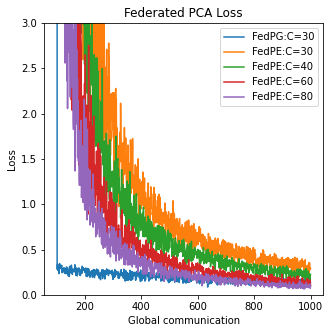

In [ ]:
iteration = np.linspace(100, 1000, 1000)
fig = plt.figure(figsize = (5, 5)) # Create a figure containing a single axes
plt.title("Federated PCA Loss")
plt.ylim(0, 3)
plt.xlabel("Global communication", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.plot(iteration, Grassman_losses_30, label="FedPG:C=30")
plt.plot(iteration, Euclidean_losses_30, label = "FedPE:C=30")
plt.plot(iteration, Euclidean_losses_40, label = "FedPE:C=40")
plt.plot(iteration, Euclidean_losses_60, label = "FedPE:C=60")
plt.plot(iteration, Euclidean_losses_80, label = "FedPE:C=80")
plt.legend(prop={'size': 10})
plt.savefig("Federated_PCA_Loss.pdf", bbox_inches="tight",pad_inches = 0)

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['loss1'] = Grassman_losses_30[1:]
df['loss2'] = Euclidean_losses_30[1:]
df['loss3'] = Euclidean_losses_40[1:]
df['loss4'] = Euclidean_losses_60[1:]
df['loss5'] = Euclidean_losses_80[1:]

In [ ]:
df['loss1'][0] = 100
df

,loss1,loss2,loss3,loss4,loss5
0,100.000000,106.850365,68.148979,43.699390,27.770569
1,0.288062,105.962479,69.965263,42.114937,29.527218
2,0.278012,111.840088,73.434822,30.916870,29.796566
3,0.319754,109.763931,51.212421,27.623266,11.584343
4,0.287473,99.900070,44.414803,24.429398,28.851330
...,...,...,...,...,...
994,0.091749,0.331067,0.240469,0.125973,0.061725
995,0.135235,0.316328,0.226474,0.163076,0.114165
996,0.123531,0.331499,0.163037,0.152246,0.081305
997,0.152897,0.309778,0.182769,0.126110,0.061448


In [ ]:
meanLoss1= np.mean(df['loss1'].values.reshape(-1,9),axis=1)
stdLoss1 = np.std(df['loss1'].values.reshape(-1,9), axis=1)

In [ ]:
meanLoss2= np.mean(df['loss2'].values.reshape(-1,9),axis=1)
stdLoss2 = np.std(df['loss2'].values.reshape(-1,9), axis=1)

In [ ]:
meanLoss3= np.mean(df['loss3'].values.reshape(-1,9),axis=1)
stdLoss3 = np.std(df['loss3'].values.reshape(-1,9), axis=1)

In [ ]:
meanLoss4= np.mean(df['loss4'].values.reshape(-1,9),axis=1)
stdLoss4 = np.std(df['loss4'].values.reshape(-1,9), axis=1)

In [ ]:
meanLoss5= np.mean(df['loss5'].values.reshape(-1,9),axis=1)
stdLoss5 = np.std(df['loss5'].values.reshape(-1,9), axis=1)

In [ ]:
meanIteration = np.mean(df.index.values.reshape(-1,9), axis=1)

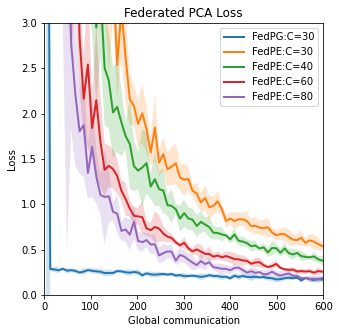

In [ ]:
iteration = np.linspace(100, 1000, 1000)
fig = plt.figure(figsize = (5, 5)) # Create a figure containing a single axes
plt.title("Federated PCA Loss")
plt.ylim(0, 3)
plt.xlim(0, 600)
plt.xlabel("Global communication", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.plot(meanIteration, meanLoss1, label="FedPG:C=30", linewidth=2)
plt.fill_between(meanIteration, meanLoss1 + stdLoss1,  meanLoss1 - stdLoss1, alpha = 0.2)
plt.plot(meanIteration, meanLoss2, label = "FedPE:C=30", linewidth=2)
plt.fill_between(meanIteration, meanLoss2 + stdLoss2,  meanLoss2 - stdLoss2, alpha = 0.2)
plt.plot(meanIteration, meanLoss3, label = "FedPE:C=40", linewidth=2)
plt.fill_between(meanIteration, meanLoss3 + stdLoss3,  meanLoss3 - stdLoss3, alpha = 0.2)
plt.plot(meanIteration, meanLoss4, label = "FedPE:C=60", linewidth=2)
plt.fill_between(meanIteration, meanLoss4 + stdLoss4,  meanLoss4 - stdLoss4, alpha = 0.2)
plt.plot(meanIteration, meanLoss5, label = "FedPE:C=80", linewidth=2)
plt.fill_between(meanIteration, meanLoss5 + stdLoss5,  meanLoss5 - stdLoss5, alpha = 0.2)
plt.legend(prop={'size': 10})
plt.savefig("Federated_PCA_Loss.pdf", bbox_inches="tight",pad_inches = 0)


plt.show()